In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [3]:
df=pd.read_csv("/home/user/Downloads/Week7_train.csv");
print(df)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [4]:
#3.check the shape of the data
df.shape

(42000, 785)

4


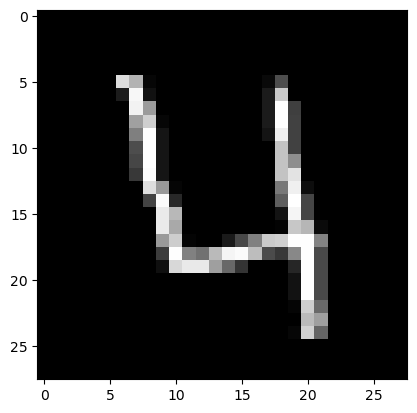

In [5]:
#4.select only 10% of the data from experiment. we will not use total data as KNN is

plt.imshow(df.iloc[3, 1:].values.reshape(28, 28),cmap='grey')
print(df.iloc[3,0]);

In [6]:
mf = df.sample(frac=0.1)
print(mf)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
14886      4       0       0       0       0       0       0       0       0   
41956      4       0       0       0       0       0       0       0       0   
21447      3       0       0       0       0       0       0       0       0   
25394      0       0       0       0       0       0       0       0       0   
36183      9       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
17837      0       0       0       0       0       0       0       0       0   
14652      3       0       0       0       0       0       0       0       0   
34456      2       0       0       0       0       0       0       0       0   
38692      1       0       0       0       0       0       0       0       0   
3544       4       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [7]:
#5.print shape of sample data
mf.shape

(4200, 785)

In [8]:
#6.look at the top 5 rows
mf.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
14886,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41956,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21447,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36183,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#7.find the no of unique class labels
n = df["label"].nunique()
print(n)

10


In [10]:
#8.print the no of examples for each class label
class1= mf["label"].value_counts()
print(class1)

label
1    485
9    446
4    424
6    414
8    411
0    410
5    409
7    407
3    406
2    388
Name: count, dtype: int64


In [11]:
#9.prepare x and y
x=mf.drop(columns=['label'])
y=mf['label']
print(x.shape)
print(y.shape)


(4200, 784)
(4200,)


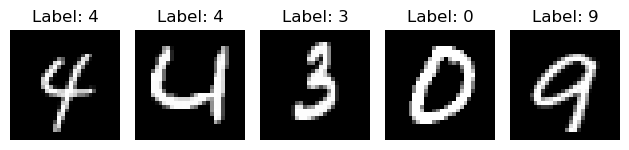

In [13]:
#10. visualization the image of the first 5 digital in x also print the class label in
for i in range(5):
    label = mf.iloc[i, 0]
    pixels = mf.iloc[i, 1:].values.reshape(28, 28)
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(pixels, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
#11.split the train dataset into training set (75%) & validation set(25%)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=42
)

print(f"Training set size: {len(x_train)}")
print(f"Validation set size: {len(x_val)}")


Training set size: 3150
Validation set size: 1050


In [15]:
#12.fit KNN classifies to training data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
#13.default parameters n-neighbours-5,metric='minkowski' p=2
knn = KNeighborsClassifier(n_neighbors=3,metric='minkowski')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
print("Predictions on validation set:", y_pred)

Predictions on validation set: [5 7 8 ... 7 9 2]


In [17]:
#predict the validation set results
y_pred = knn.predict(x_val)
print("Predictions on validation set:", y_pred)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

Predictions on validation set: [5 7 8 ... 7 9 2]
Validation Accuracy: 0.93


In [18]:
#15.print the confusion matrix
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 86   0   0   0   0   1   0   0   0   0]
 [  0 123   0   0   0   0   0   0   1   0]
 [  0   3  83   3   0   0   0   4   1   0]
 [  1   3   1  81   0   3   0   1   1   1]
 [  0   2   0   0  97   0   0   1   0   2]
 [  1   0   0   7   0 112   1   0   1   0]
 [  0   0   0   0   0   1  97   0   0   0]
 [  0   2   0   0   1   0   0 112   0   3]
 [  2   4   1   2   2   3   0   0  84   2]
 [  1   1   0   2   3   0   0   3   2 101]]


In [19]:
#printing classification report and accuracy
accuracy = accuracy_score(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)
report = classification_report(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

Validation Accuracy: 0.93

Confusion Matrix:
 [[ 86   0   0   0   0   1   0   0   0   0]
 [  0 123   0   0   0   0   0   0   1   0]
 [  0   3  83   3   0   0   0   4   1   0]
 [  1   3   1  81   0   3   0   1   1   1]
 [  0   2   0   0  97   0   0   1   0   2]
 [  1   0   0   7   0 112   1   0   1   0]
 [  0   0   0   0   0   1  97   0   0   0]
 [  0   2   0   0   1   0   0 112   0   3]
 [  2   4   1   2   2   3   0   0  84   2]
 [  1   1   0   2   3   0   0   3   2 101]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        87
           1       0.89      0.99      0.94       124
           2       0.98      0.88      0.93        94
           3       0.85      0.88      0.87        92
           4       0.94      0.95      0.95       102
           5       0.93      0.92      0.93       122
           6       0.99      0.99      0.99        98
           7       0.93      0.95      0.94       118
           

/home/user/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


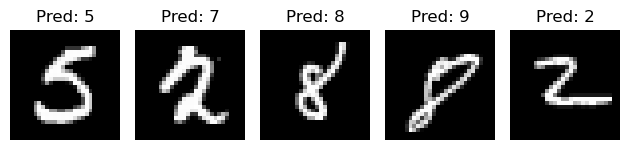

In [24]:
#17.visualize the image of the first 5 digit in x-test also print the predicted
for i in range(5):
    image = x_val.iloc[i].values.reshape(28, 28)  # Get row, convert to array, reshape
    prediction = knn.predict([x_val.iloc[i].values])[0]

    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Pred: {prediction}")
    plt.axis('off')

plt.tight_layout()
plt.show()